In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

In [2]:
from sklearn.datasets import make_moons

In [126]:
data,target = make_moons(n_samples=400,noise=0.2)

In [54]:
data[0]

array([0.01043203, 0.06099164])

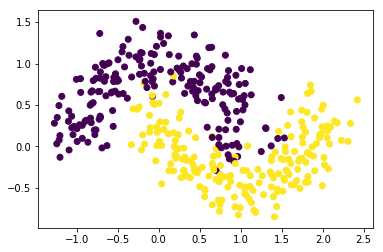

In [55]:
plt.scatter(data[:,0],data[:,1],c=target)
plt.show()

In [97]:
def plot_boundary(predict):
    x1 = np.arange(min(data[:,0]) - 1, max(data[:,0]) + 1,0.01)
    x2 = np.arange(min(data[:,1]) - 1, max(data[:,1]) + 1,0.01)
    
    xx,yy = np.meshgrid(x1,x2)
    x = np.array([xx.flatten(),yy.flatten()]).T
    z = predict(x)
    z = z.reshape(xx.shape)
    plt.figure(figsize=(10,6))
    plt.contourf(xx,yy,z,cmap=ListedColormap(('cyan','red')))
    plt.scatter(data[:,0],data[:,1],c=target)
    plt.show()

# Logistic Regression

In [57]:
clf = LogisticRegression()
clf.fit(data,target)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

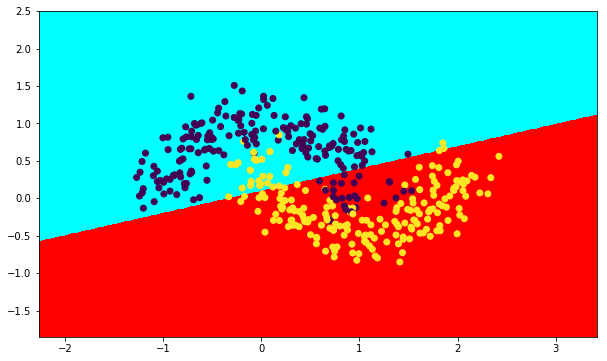

In [98]:
plot_boundary(clf.predict)

# Support Vector Machines

In [99]:
svm = SVC()
svm.fit(data,target)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

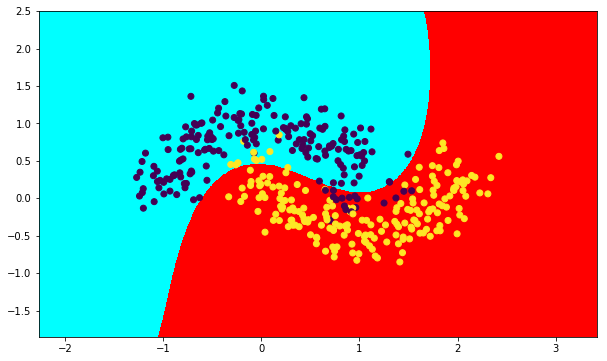

In [100]:
plot_boundary(svm.predict)

# Neural Networks

In [127]:
#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

In [142]:
def prediction(X,weights):
    wh,wout,bh,bout = weights
    hidden_layer_input1=np.dot(X,wh)
    hidden_layer_input=hidden_layer_input1 + bh
    hiddenlayer_activations = sigmoid(hidden_layer_input)
    output_layer_input1=np.dot(hiddenlayer_activations,wout)
    output_layer_input= output_layer_input1+ bout
    output = sigmoid(output_layer_input)
    
    return output

In [129]:
def model(hiddenlayer_neurons):
    wh,bh,wout,bout = init_weights(hiddenlayer_neurons)
    for i in range(epoch):
        #Forward Propogation
        hidden_layer_input1=np.dot(data,wh)
        hidden_layer_input=hidden_layer_input1 + bh
        hiddenlayer_activations = sigmoid(hidden_layer_input)
        output_layer_input1=np.dot(hiddenlayer_activations,wout)
        output_layer_input= output_layer_input1+ bout
        output = sigmoid(output_layer_input)

        #Backpropagation
        E = target.reshape(-1,1) - output
        slope_output_layer = derivatives_sigmoid(output)
        slope_hidden_layer = derivatives_sigmoid(hiddenlayer_activations)
        d_output = E * slope_output_layer
        Error_at_hidden_layer = d_output.dot(wout.T)
        d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer
        wout += hiddenlayer_activations.T.dot(d_output) *lr
        bout += np.sum(d_output, axis=0,keepdims=True) *lr
        wh += data.T.dot(d_hiddenlayer) *lr
        bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr
    
    return wh,wout,bh,bout

In [130]:
def init_weights(hiddenlayer_neurons):

    wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
    bh=np.random.uniform(size=(1,hiddenlayer_neurons))
    wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
    bout=np.random.uniform(size=(1,output_neurons))
    
    return wh,bh,wout,bout

In [131]:
epoch=50000 #Setting training iterations
lr=0.1 #Setting learning rate
inputlayer_neurons = data.shape[1] #number of features in data set
hiddenlayer_neurons = 3 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer

In [132]:
# wh,wout,bh,bout,output = model()

In [133]:
# for i in range(len(output)):
#     output[i] = int(round(output[i][0]))

In [134]:
# from sklearn.metrics import accuracy_score

In [135]:
# accuracy_score(target,output)

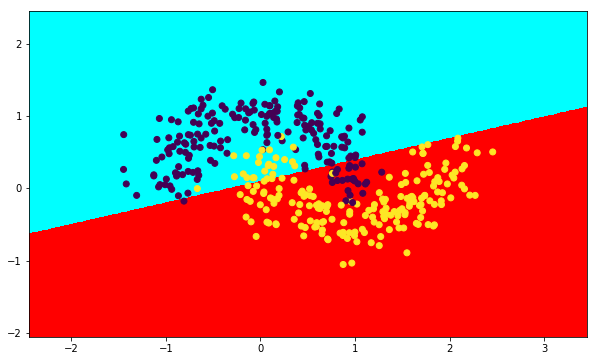

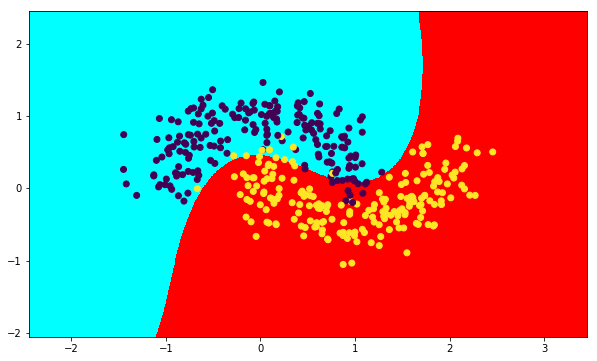

In [137]:
plot_boundary(clf.predict)
plot_boundary(svm.predict)

In [138]:
weights = model(3)

In [147]:
weights

(array([[  4.59107294,  -7.20026855,  18.26034303],
        [  4.06283315,   4.18150762, -13.31144432]]), array([[-29.15039292],
        [-38.33533997],
        [ 19.0431357 ]]), array([[ -1.56253318,  -4.36246322, -23.05738792]]), array([[24.50058906]]))

In [150]:
y = lambda x : prediction(data,weights)

In [152]:
y(data).shape

(400, 1)